In [77]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Configuration

In [78]:
import yaml

with open('./config/param.yml') as fid:
    config = yaml.safe_load(fid)

# Load dataset

In [79]:
# Get data 
import pandas as pd
dataset = pd.read_csv(config['data_process']['in_path'])

In [80]:
# feature names
dataset.columns = [colname.strip(' (cm)').replace(' ', '_') for colname in dataset.columns.tolist()]

In [81]:
feature_names = dataset.columns.tolist()
feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

# Features engineering

In [82]:
dataset['sepal_length_to_sepal_width'] = dataset['sepal_length'] / dataset['sepal_width']
dataset['petal_length_to_petal_width'] = dataset['petal_length'] / dataset['petal_width']

dataset.to_csv(config["data_process"]["out_path"], index=False)

# Split dataset

In [67]:
test_size=config['data_split']['test_size']
random_state=config['base']['random_state']

## Splittail train/test

In [68]:
train_dataset, test_dataset = train_test_split(dataset, test_size=test_size, random_state=random_state)
train_dataset.shape, test_dataset.shape

((120, 7), (30, 7))

# Train

In [69]:
# Get X and Y

y_train = train_dataset.loc[:, 'target'].values.astype('int32')
X_train = train_dataset.drop('target', axis=1).values.astype('float32')

In [86]:
# Create an instance of Logistic Regression Classifier CV and fit the data

logreg = LogisticRegression(**config['train']['clf_params'])
logreg.fit(X_train, y_train)

LogisticRegression(C=0.001, multi_class='multinomial')

# Evaluate

In [91]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    fig, ax = plt.subplots(figsize=(8, 6))
    t = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    fig.colorbar(t)

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        ax.set_xticks(tick_marks, target_names, rotation=45)
        ax.set_yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            ax.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            ax.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    
    return fig, ax 

In [92]:
# Get X and Y

y_test = test_dataset.loc[:, 'target'].values.astype('int32')
X_test = test_dataset.drop('target', axis=1).values.astype('float32')

In [93]:
prediction = logreg.predict(X_test)
cm = confusion_matrix(prediction, y_test)
f1 = f1_score(y_true = y_test, y_pred = prediction, average='macro')

In [94]:
# f1 score value
f1

0.9305555555555555

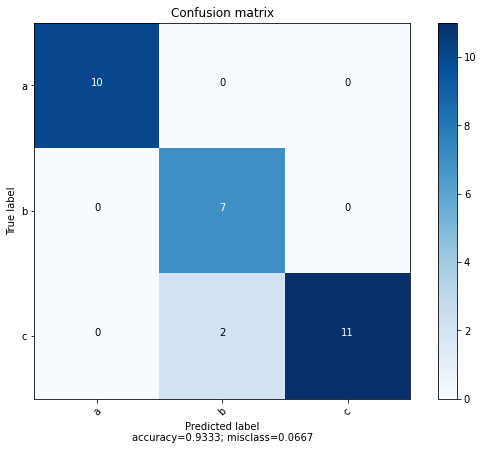

In [95]:
fig, ax = plot_confusion_matrix(cm, ['a','b','c'], normalize=False)

In [96]:
fig.savefig(config['reports']['confusion_matrix_png'], transparent=True)